# TDDE16 Text Mining Individual Project
* By Axel Strid (axest556)
* Linköping University
* Course taken during HT2 2025

# Analyzing NHL Interview Data Using Text Mining Techniques
* Using various text mining techniques to classify NHL interview data into 'coach' and 'player' roles.

# Interpretation File: Intepretation of Model Predictions

## Step 0: Setup Environment
To set up your python environment:
1. Create a virtual environment (venv)
2. Activate the virtual environment
3. Install the required packages in `requirements.txt` using pip

## Step 1: Data preparation

This project uses interview data stored in a Kaggle dataset. To load the data, run the cell below:

In [151]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

### LOAD THE DATASET ###

# Set the path to the file you'd like to load
file_path = "interview_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dtamming/national-hockey-league-interviews",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


### SPLIT THE DATASET ###
train = df.sample(frac=0.7, random_state=123456789) # seed for reproducibility
test = df.drop(train.index)

### UNDERSAMPLING ###
train_filtered = train[train['job'] != 'other']
least_common_count = train_filtered['job'].value_counts().min()
train_balanced = train_filtered.groupby('job').apply(lambda x: x.sample(least_common_count, random_state=123456789)).reset_index(drop=True)
test_without_other = test[test['job'] != 'other']

/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2997444911.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(
/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2997444911.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_balanced = train_filtered.groupby('job').apply(lambda x: x.sample(least_common_count, random_state=123456789)).reset_index(drop=True)


## Step 2: Re-create best models from main file

**On the full dataset, using all 3 classes**:
#### Multinomial Logistic Regression - Count Vectorizer

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Multinomial Logistic Regression with Stop Words still included in training
MLR_pipe_with_stop_words = Pipeline([("vectorizer", CountVectorizer()), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipe_with_stop_words.fit(train['text'], train['job'])
y_pred = MLR_pipe_with_stop_words.predict(test['text'])
print("Classification Report for MLR with Stop Words Included:")
print(classification_report(test['job'], y_pred))

# 2. Multinomial Logistic Regression with Stop Words removed
MLR_pipe_no_stop_words = Pipeline([("vectorizer", CountVectorizer(stop_words='english')), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipe_no_stop_words.fit(train['text'], train['job'])
y_pred = MLR_pipe_no_stop_words.predict(test['text'])
print("Classification Report for MLR with Stop Words Removed:")
print(classification_report(test['job'], y_pred))

/Users/axelstrid/Desktop/TDDE16/TDDE16-Text-Mining-Project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for MLR with Stop Words Included:
              precision    recall  f1-score   support

       coach       0.88      0.85      0.86       140
       other       0.59      0.38      0.47        26
      player       0.94      0.97      0.95       463

    accuracy                           0.92       629
   macro avg       0.80      0.73      0.76       629
weighted avg       0.91      0.92      0.91       629

Classification Report for MLR with Stop Words Removed:
              precision    recall  f1-score   support

       coach       0.86      0.84      0.85       140
       other       0.80      0.46      0.59        26
      player       0.93      0.96      0.95       463

    accuracy                           0.91       629
   macro avg       0.86      0.76      0.79       629
weighted avg       0.91      0.91      0.91       629



**On the Full dataset, using only 2 classes**:
#### Multinomial Logistic Regression - Count Vectorizer

In [157]:
# 2-class classification (Coach vs Player) on full dataset setup
df_2class = df[df['job'] != 'other']
train_2class = df_2class.sample(frac=0.7, random_state=123456789) # seed for reproducibility
test_2class = df_2class.drop(train_2class.index)

# 3. Multinomal Logistic Regression on 2-class full dataset (Coach vs Player) with stop words included in training
MLR_pipe_2class_with_stop_words = Pipeline([("vectorizer", CountVectorizer()), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipe_2class_with_stop_words.fit(train_2class['text'], train_2class['job'])
y_pred = MLR_pipe_2class_with_stop_words.predict(test_2class['text'])
print("Classification Report for 2-Class MLR with Stop Words Included:")
print(classification_report(test_2class['job'], y_pred))

# 4. Multinomal Logistic Regression on 2-class full dataset (Coach vs Player) without stop words in training
MLR_pipe_2class_no_stop_words = Pipeline([("vectorizer", CountVectorizer(stop_words='english')), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipe_2class_no_stop_words.fit(train_2class['text'], train_2class['job'])
y_pred = MLR_pipe_2class_no_stop_words.predict(test_2class['text'])
print("Classification Report for 2-Class MLR without Stop Words:")
print(classification_report(test_2class['job'], y_pred))

/Users/axelstrid/Desktop/TDDE16/TDDE16-Text-Mining-Project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for 2-Class MLR with Stop Words Included:
              precision    recall  f1-score   support

       coach       0.94      0.84      0.89       158
      player       0.95      0.98      0.96       446

    accuracy                           0.94       604
   macro avg       0.94      0.91      0.92       604
weighted avg       0.94      0.94      0.94       604

Classification Report for 2-Class MLR without Stop Words:
              precision    recall  f1-score   support

       coach       0.93      0.88      0.90       158
      player       0.96      0.98      0.97       446

    accuracy                           0.95       604
   macro avg       0.94      0.93      0.93       604
weighted avg       0.95      0.95      0.95       604



**On the balanced dataset, using only 2 classes**:
#### Multinomial Logistic Regression - TF-IDF Vectorizer - Balanced Dataset

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

MLR_pipe_balanced = Pipeline([("vectorizer", TfidfVectorizer(stop_words="english")), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipe_balanced.fit(train_balanced['text'], train_balanced['job'])
y_pred = MLR_pipe_balanced.predict(test_without_other['text'])
print(classification_report(test_without_other['job'], y_pred))

              precision    recall  f1-score   support

       coach       0.79      0.93      0.85       140
      player       0.98      0.92      0.95       463

    accuracy                           0.93       603
   macro avg       0.88      0.93      0.90       603
weighted avg       0.93      0.93      0.93       603



## Step 3: Interpretation with LIME

In [165]:
# Setup LIME 

from lime.lime_text import LimeTextExplainer
import numpy as np
from IPython.display import display, HTML
import random

# Initialize LIME Explainer for full 3-class model and balanced 2-class model
# We tell LIME the class names we are predicting
class_names_full = MLR_pipe_with_stop_words.classes_
explainer_full = LimeTextExplainer(class_names=class_names_full)
class_names_balanced = MLR_pipe_balanced.classes_
explainer_balanced = LimeTextExplainer(class_names=class_names_balanced)

# Helper function to visualize an explanation
def explain_prediction(doc_index, dataset, pipeline, explainer):
    text_instance = dataset.iloc[doc_index]['text']
    true_label = dataset.iloc[doc_index]['job']
    predicted_label = pipeline.predict([text_instance])[0]
    
    # Get the index of the predicted label
    pred_proba = pipeline.predict_proba([text_instance])[0]
    top_pred_index = np.argmax(pred_proba)
    
    # Generate explanation
    # num_features=6 shows the top 6 words influencing the decision
    exp = explainer.explain_instance(text_instance, pipeline.predict_proba, num_features=10, labels=[top_pred_index])
    
    print(f"Document Index: {doc_index}")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Predicted probabilities " + str(pipeline.classes_) + ": " + str(pipeline.predict_proba([text_instance])[0]))
    
    # Show the plot in the notebook
    display(HTML(exp.as_html(text=True)))

# Let's grab a random row number from the test dataframe
random_idx_full = random.randint(0, len(test)-1)
random_idx_balanced = random.randint(0, len(test_without_other)-1)

print("--- EXPLAINING A RANDOM TEST SAMPLE ON 3-CLASS MODEL WITH STOP WORDS INCLUDED IN TRAINING ---")
print("Multinomial Logistic Regression Explanation:")
explain_prediction(random_idx_full, test, MLR_pipe_with_stop_words, explainer_full)

print("--- EXPLAINING A RANDOM TEST SAMPLE ON 3-CLASS MODEL WITH STOP WORDS REMOVED IN TRAINING ---")
print("Multinomial Logistic Regression Explanation:")
explain_prediction(random_idx_full, test, MLR_pipe_no_stop_words, explainer_full)

print("--- EXPLAINING A RANDOM TEST SAMPLE ON BALANCED 2-CLASS MODEL ---")
print("Multinomial Logistic Regression Balanced Explanation:")
explain_prediction(random_idx_balanced, test_without_other, MLR_pipe_balanced, explainer_balanced)

--- EXPLAINING A RANDOM TEST SAMPLE ON 3-CLASS MODEL WITH STOP WORDS INCLUDED IN TRAINING ---
Multinomial Logistic Regression Explanation:
Document Index: 208
True Label: coach
Predicted Label: coach
Predicted probabilities ['coach' 'other' 'player']: [6.02645474e-01 2.54468530e-05 3.97329079e-01]


--- EXPLAINING A RANDOM TEST SAMPLE ON 3-CLASS MODEL WITH STOP WORDS REMOVED IN TRAINING ---
Multinomial Logistic Regression Explanation:
Document Index: 208
True Label: coach
Predicted Label: coach
Predicted probabilities ['coach' 'other' 'player']: [9.09353370e-01 1.13665507e-05 9.06352639e-02]


--- EXPLAINING A RANDOM TEST SAMPLE ON BALANCED 2-CLASS MODEL ---
Multinomial Logistic Regression Balanced Explanation:
Document Index: 60
True Label: player
Predicted Label: player
Predicted probabilities ['coach' 'player']: [0.33125777 0.66874223]


## Step 4: Log-Odds Ratio (Feature Importance Analysis)

This method compares the probability of a word occurring in "Coach" text vs. "Player" text.

* **High Positive Log-Odds**: Distinctive to ***Coach***.
* **High Negative Log-Odds**: Distinctive to ***Player***.

**Note**: Removing stop words from the analysis, or keeping them in, does not affect the results significantly, as stop words are common across both classes. Log-odds ratio focuses on relative frequency differences (such as "I" being more common in player interviews than "we" in coach interviews).

### On the full (unbalanced) 2-class dataset (Player vs Coach)

/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/1937687503.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/1937687503.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')


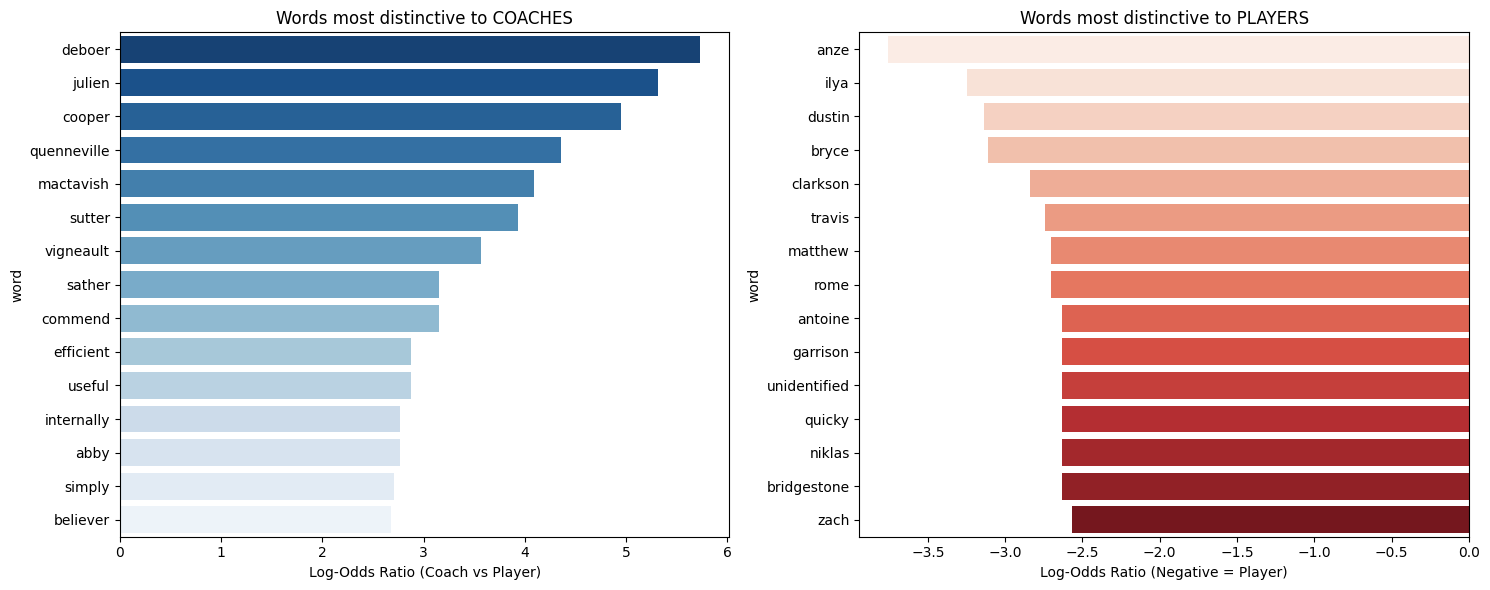

Top Coach Words: ['deboer', 'julien', 'cooper', 'quenneville', 'mactavish', 'sutter', 'vigneault', 'sather', 'commend', 'efficient', 'useful', 'internally', 'abby', 'simply', 'believer']
Top Player Words: ['anze', 'ilya', 'dustin', 'bryce', 'clarkson', 'travis', 'matthew', 'rome', 'antoine', 'garrison', 'unidentified', 'quicky', 'niklas', 'bridgestone', 'zach']
Most used words for Coaches (Overall): [['think', 8260], ['game', 6721], ['know', 4216], ['going', 4058], ['play', 3578], ['good', 3514], ['don', 3459], ['got', 3405], ['team', 3352], ['just', 3144], ['like', 3028], ['lot', 2817], ['guys', 2473], ['ve', 2406], ['way', 2156]]
Most used words for Players (Overall): [['think', 7326], ['game', 6029], ['just', 4880], ['know', 4785], ['going', 4759], ['play', 3727], ['like', 3248], ['good', 3238], ['got', 3215], ['don', 3119], ['lot', 3061], ['team', 2973], ['really', 2557], ['time', 2180], ['great', 2173]]


In [166]:
# Log-Odds Ratio Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Helper function to calculate log-odds ratio
def calculate_log_odds(df, text_column='text'):
    # Fit CountVectorizer to get vocabulary and counts
    # Using 'english' stop words to focus on content (i.e: remove common words like "the", "is", etc.)
    cv = CountVectorizer(stop_words='english') 
    X = cv.fit_transform(df[text_column])
    
    # Get feature names (vocabulary)
    feature_names = cv.get_feature_names_out()
    
    # Separate counts by class
    # Create masks for the two classes
    mask_coach = (df['job'] == 'coach').values
    mask_player = (df['job'] == 'player').values
    
    # Sum counts for each word across all documents in that class
    counts_coach = X[mask_coach].sum(axis=0).A1
    counts_player = X[mask_player].sum(axis=0).A1
    
    # Apply Laplace Smoothing (+1) to avoid division by zero
    # This represents "prior" belief that every word appears at least once
    counts_coach = counts_coach + 1
    counts_player = counts_player + 1
    
    # Convert to probabilities (normalize by total word count in that class)
    probs_coach = counts_coach / counts_coach.sum()
    probs_player = counts_player / counts_player.sum()
    
    # Calculate Log-Odds Ratio
    # log(Prob_Coach / Prob_Player)
    log_odds = np.log(probs_coach / probs_player)
    
    # Return DataFrame
    results = pd.DataFrame({
        'word': feature_names,
        'log_odds': log_odds,
        'count_coach': counts_coach - 1, # Removing the smoothing for display
        'count_player': counts_player - 1
    })
    
    return results

# Calculate
importance_df = calculate_log_odds(df)

# Get Top 15 words for Coach (Highest Log-Odds)
top_coach = importance_df.sort_values('log_odds', ascending=False).head(15)

# Get Top 15 words for Player (Lowest Log-Odds)
top_player = importance_df.sort_values('log_odds', ascending=True).head(15)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Coach Words
sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
axes[0].set_title('Words most distinctive to COACHES')
axes[0].set_xlabel('Log-Odds Ratio (Coach vs Player)')

# Plot Player Words
# We take absolute value of log_odds for visualization length, but keep them separate
sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')
axes[1].set_title('Words most distinctive to PLAYERS')
axes[1].set_xlabel('Log-Odds Ratio (Negative = Player)')

plt.tight_layout()
plt.show()

# Print the lists for the report
print("Top Coach Words:", top_coach['word'].tolist())
print("Top Player Words:", top_player['word'].tolist())

# Print most used words overall for additional context
print("Most used words for Coaches (Overall):", importance_df.sort_values('count_coach', ascending=False).head(15)[['word', 'count_coach']].values.tolist())
print("Most used words for Players (Overall):", importance_df.sort_values('count_player', ascending=False).head(15)[['word', 'count_player']].values.tolist())

#### Vocabulary Inspection

In [167]:
### WITH STOP WORDS STILL INCLUDED! ###
cv = CountVectorizer(stop_words=None) 
X = cv.fit_transform(df['text'])
    
# Get feature names (vocabulary)
feature_names = cv.get_feature_names_out()
print(feature_names[11073])

# See if some common stop words are in the vocabulary
feature_set = set(feature_names)
common_stop_words = {'the', 'is', 'and', 'to', 'a', 'of', 'in', 'that', 'it', 'you'}
stop_words_in_vocab = common_stop_words.intersection(feature_set)
print("Common stop words found in vocabulary:", stop_words_in_vocab)

# Find index for the word "the" if it exists
if 'the' in feature_set:
    the_index = list(feature_names).index('the')
    print(f"Index of 'the' in feature names: {the_index}")

# Number of "the" occurrences in the dataset
the_count = X[:, the_index].sum()
print(f"Total occurrences of 'the' in the dataset: {the_count} \n")
    
    
    
    
### WITH STOP WORDS REMOVED ###
cv = CountVectorizer(stop_words='english') 
X = cv.fit_transform(df['text'])
    
# Get feature names (vocabulary)
feature_names = cv.get_feature_names_out()
print(feature_names[11073])

# See if some common stop words are in the vocabulary
feature_set = set(feature_names)
common_stop_words = {'the', 'is', 'and', 'to', 'a', 'of', 'in', 'that', 'it', 'you'}
stop_words_in_vocab = common_stop_words.intersection(feature_set)
print("Common stop words found in vocabulary:", stop_words_in_vocab)

# Find index for the word "the" if it exists
if 'the' in feature_set:
    the_index = list(feature_names).index('the')
    print(f"Index of 'the' in feature names: {the_index} \n")

the
Common stop words found in vocabulary: {'in', 'of', 'and', 'to', 'that', 'is', 'you', 'it', 'the'}
Index of 'the' in feature names: 11073
Total occurrences of 'the' in the dataset: 61626 

touchdown
Common stop words found in vocabulary: set()


### On the balanced 2-class dataset (Player vs Coach)

/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2473380863.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_filtered.groupby('job').apply(lambda x: x.sample(least_common_count, random_state=123456789)).reset_index(drop=True)
/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2473380863.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2473380863.py:25: FutureWarning:

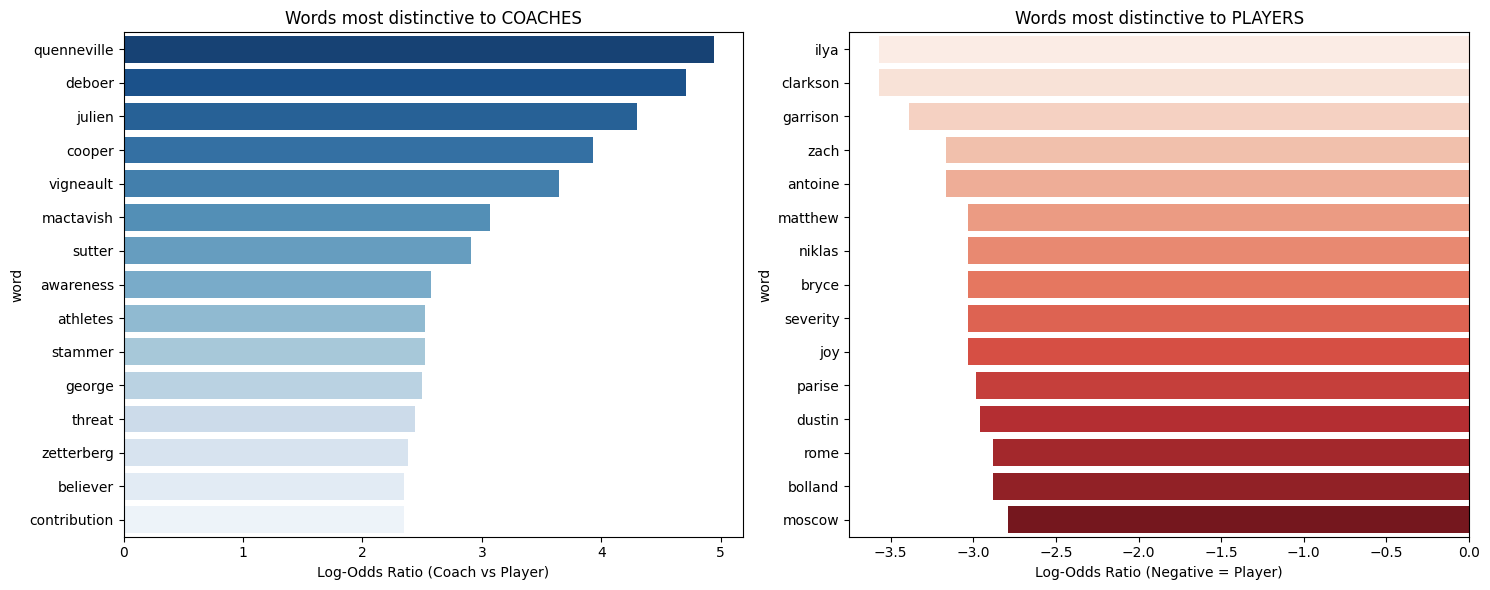

Top Coach Words: ['quenneville', 'deboer', 'julien', 'cooper', 'vigneault', 'mactavish', 'sutter', 'awareness', 'athletes', 'stammer', 'george', 'threat', 'zetterberg', 'believer', 'contribution']
Top Player Words: ['ilya', 'clarkson', 'garrison', 'zach', 'antoine', 'matthew', 'niklas', 'bryce', 'severity', 'joy', 'parise', 'dustin', 'rome', 'bolland', 'moscow']
Most used words for Coaches (Overall): [['think', 8260], ['game', 6721], ['know', 4216], ['going', 4058], ['play', 3578], ['good', 3514], ['don', 3459], ['got', 3405], ['team', 3352], ['just', 3144], ['like', 3028], ['lot', 2817], ['guys', 2473], ['ve', 2406], ['way', 2156]]
Most used words for Players (Overall): [['think', 2486], ['game', 2025], ['just', 1651], ['going', 1588], ['know', 1575], ['play', 1208], ['good', 1092], ['like', 1085], ['team', 1058], ['don', 1043], ['got', 1042], ['lot', 1017], ['really', 906], ['great', 753], ['time', 723]]


In [171]:
# Log-Odds Ratio Analysis on balanced dataset
df_filtered = df[df['job'] != 'other']
least_common_count = df_filtered['job'].value_counts().min()
df_balanced = df_filtered.groupby('job').apply(lambda x: x.sample(least_common_count, random_state=123456789)).reset_index(drop=True)

# Calculate
importance_df = calculate_log_odds(df_balanced)

# Get Top 15 words for Coach (Highest Log-Odds)
top_coach = importance_df.sort_values('log_odds', ascending=False).head(15)

# Get Top 15 words for Player (Lowest Log-Odds)
top_player = importance_df.sort_values('log_odds', ascending=True).head(15)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Coach Words
sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
axes[0].set_title('Words most distinctive to COACHES')
axes[0].set_xlabel('Log-Odds Ratio (Coach vs Player)')

# Plot Player Words
# We take absolute value of log_odds for visualization length, but keep them separate
sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')
axes[1].set_title('Words most distinctive to PLAYERS')
axes[1].set_xlabel('Log-Odds Ratio (Negative = Player)')

plt.tight_layout()
plt.show()

# Print the lists for the report
print("Top Coach Words:", top_coach['word'].tolist())
print("Top Player Words:", top_player['word'].tolist())

# Print most used words overall for additional context
print("Most used words for Coaches (Overall):", importance_df.sort_values('count_coach', ascending=False).head(15)[['word', 'count_coach']].values.tolist())
print("Most used words for Players (Overall):", importance_df.sort_values('count_player', ascending=False).head(15)[['word', 'count_player']].values.tolist())

## Step 5: Average Feature Effect on the Training Data

Following documentation from: https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html

Top 5 keywords per class:
  coach other player
0  that    of     it
1   our   the     to
2  game   for    and
3    in  team     we
4    is   are   have


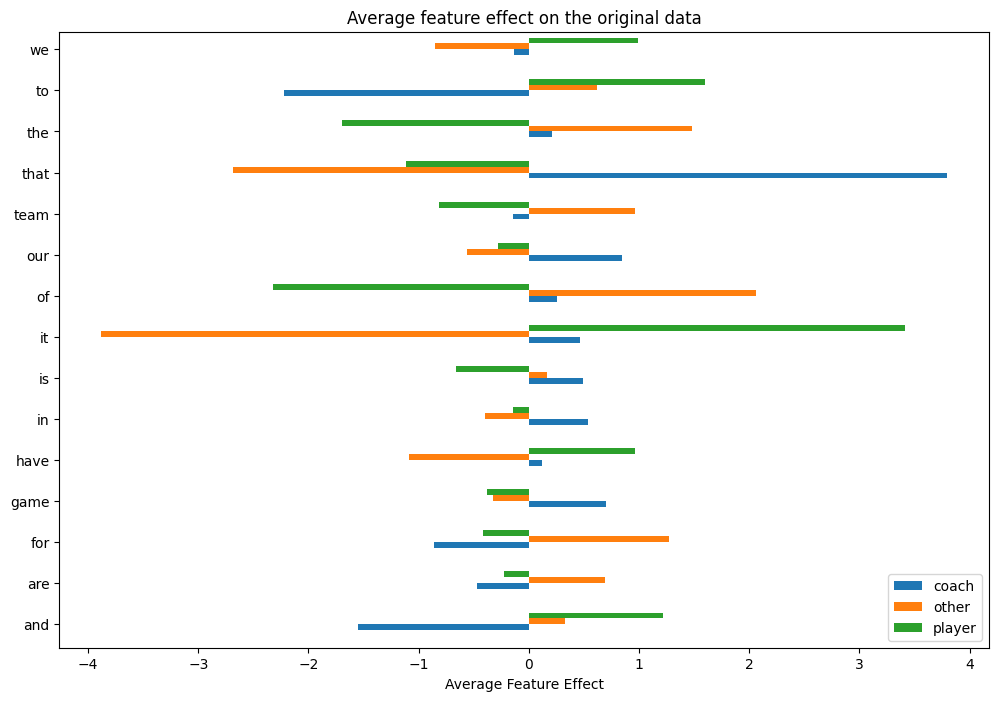

Top 5 keywords per class:
   coach    other player
0  think  players    lot
1   game    coach   just
2    don     team  great
3    got   really   like
4  right   hockey  going


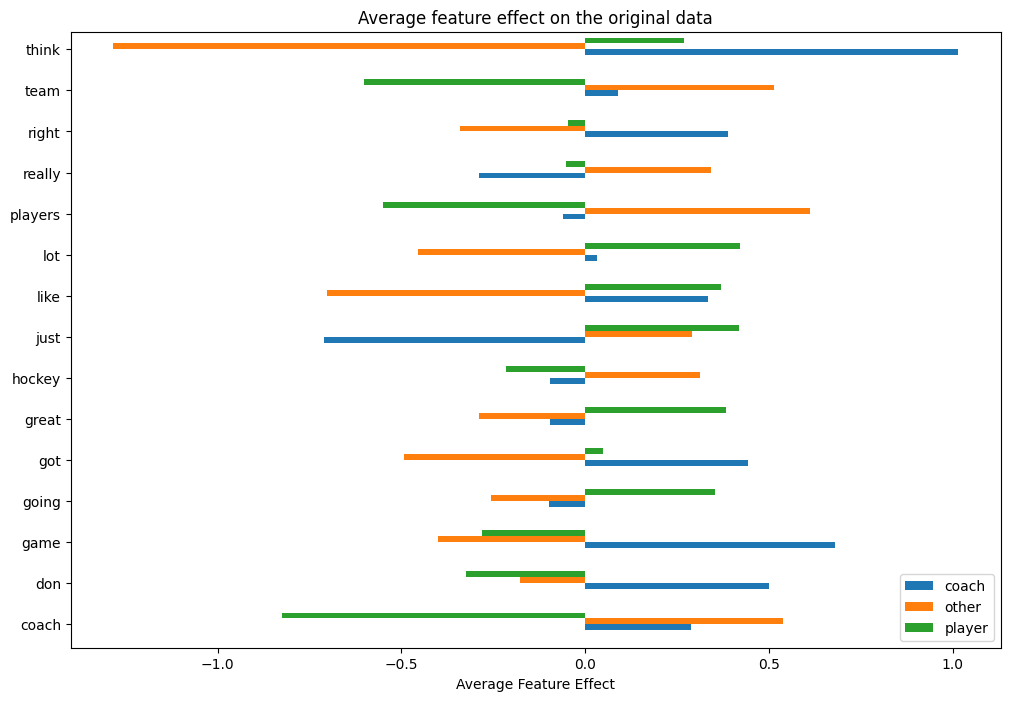

Top 5 keywords per class:
     coach     player
0    think       just
1     game  obviously
2    coach       yeah
3  players      great
4       ve       kind


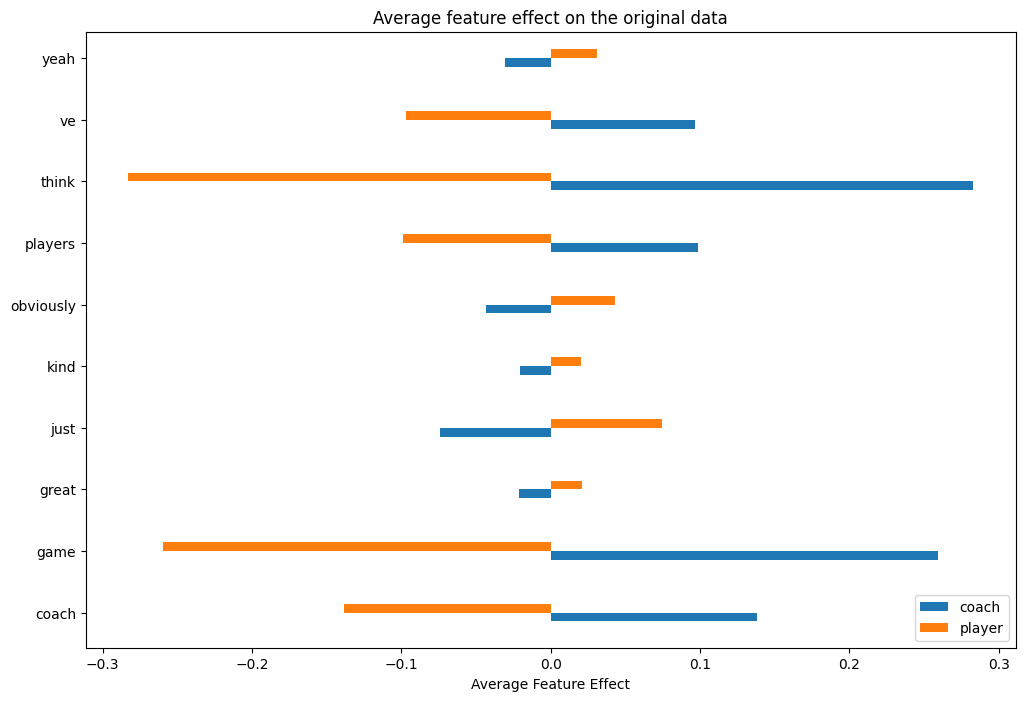

Top 5 keywords per class:
  coach player
0  that     to
1   you     it
2  game    and
3    of   have
4   our   know


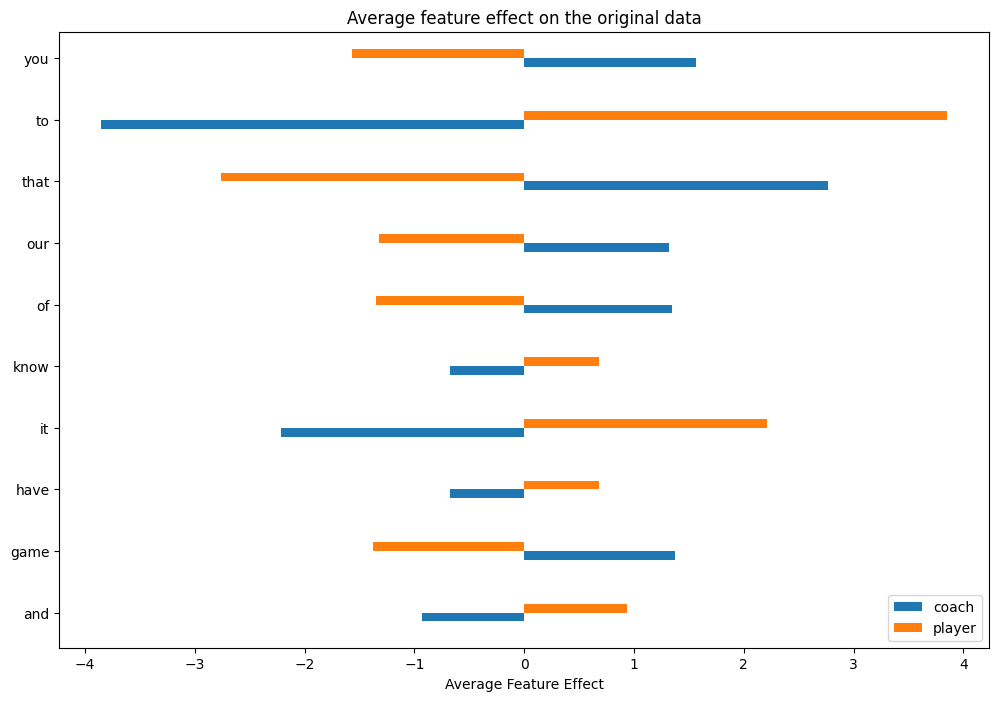

Top 5 keywords per class:
     coach player
0     game   just
1    coach  great
2    think  going
3      got   yeah
4  thought   play


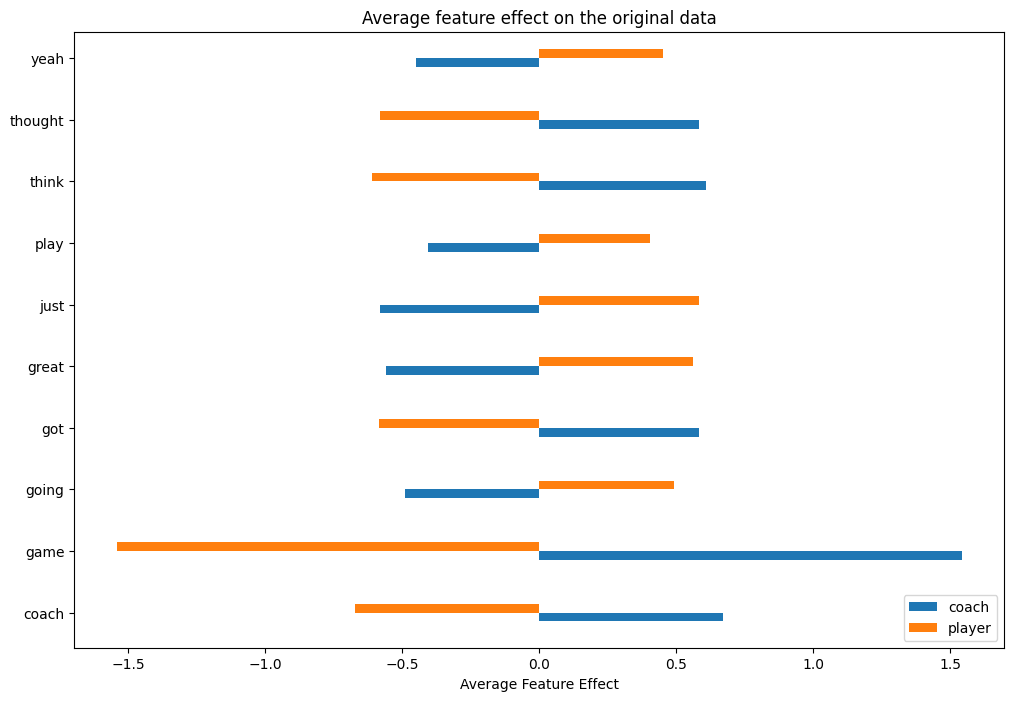

In [ ]:

# Average Feature Effect Plot

def plot_feature_effects(pipeline, train_df, text_column='text'):
    # Extract components from the pipeline and get feature/target names
    vectorizer = pipeline.named_steps['vectorizer']
    classifier = pipeline.named_steps['classifier']
    feature_names = vectorizer.get_feature_names_out()
    target_names = classifier.classes_ # on all classes
    # target_names = ['coach', 'player']  # Manually set for 2-class case
    
    # Transform training data to get X_train (sparse matrix)
    X_train = vectorizer.transform(train_df[text_column])
    
    # Calculate average feature effects
    # learned coefficients * average frequency of appearance
    # Note: classifier.coef_ shape is (n_classes, n_features) for multiclass or (1, n_features) for binary
    # If binary (Coach vs Player), sklearn stores only 1 set of coefficients.
    
    if len(target_names) == 2:
        # Binary case: coef_ is (1, n_features). 
        # We need to create effects for both classes manually.
        # Class 0 (negative coefs) and Class 1 (positive coefs).
        coefs = classifier.coef_[0]
        avg_feature_values = np.asarray(X_train.mean(axis=0)).ravel()
        
        # Effect for class 1 (e.g., Player)
        effect_c1 = coefs * avg_feature_values
        # Effect for class 0 (e.g., Coach) is just the inverse
        effect_c0 = -coefs * avg_feature_values
        
        average_feature_effects = np.vstack([effect_c0, effect_c1])
    else:
        # Multiclass case
        average_feature_effects = classifier.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    # Identify top 5 keywords per class
    top_indices = []
    top_df = pd.DataFrame()
    
    for i, label in enumerate(target_names):
        # Get indices of top 5 largest effects for this class
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        
        if i == 0:
            top_df = pd.DataFrame({label: feature_names[top5]})
            top_indices = top5
        else:
            top_df[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
            
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # Plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(12, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 0.5) * bar_size, # Adjusted offset for 2 classes
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
        xlabel='Average Feature Effect'
    )
    ax.legend(loc="lower right")
    ax.set_title("Average feature effect on the original data")

    print("Top 5 keywords per class:")
    print(top_df)

    return ax

# MLR with stop words included
_ = plot_feature_effects(MLR_pipe_with_stop_words, train, )
plt.show()

# MLR without stop words
_ = plot_feature_effects(MLR_pipe_no_stop_words, train)
plt.show()

# MLR on balanced 2-class dataset
_ = plot_feature_effects(MLR_pipe_balanced, train_balanced)
plt.show()

# MLR on 2-class full dataset with stop words
_ = plot_feature_effects(MLR_pipe_2class_with_stop_words, train_2class)
plt.show()

# MLR on 2-class full dataset without stop words
_ = plot_feature_effects(MLR_pipe_2class_no_stop_words, train_2class)
plt.show()

### Log-Odds Ratio vs. Average Feature Effect
The difference lies in **Frequency vs. Distinctiveness**.

1. **Log-Odds Ratio (Distinctiveness)**
* **What**: Data Analysis (Model-Agnostic)
* **What it measures**: How much more likely is a word to appear in Class A vs Class B.
* **Why names appear here**: Names like "DeBoer" or "Anze" are highly specific. If "DeBoer" appears 50 times in the Coach class and 0 times in the Player class, the ratio is massive. Log-odds penalizes common words (like "the" or "hockey") because they appear frequently in both classes, resulting in a ratio near zero.
* **Use case**: Finding unique identifiers or "keywords" for a class.

2. **Average Feature Effect (Importance)**
* **What**: Model Interpretation (Model-Specific)
* **What it measures**: How much does this word contribute to the model's decision making across the entire dataset.
* **Why common words appear here**: Words like "think", "game", or "we" appear in almost every interview. Even if they only slightly lean towards one class (e.g., players say "we" 60% of the time, coaches 40%), their sheer volume means they help classify hundreds of documents. A name like "DeBoer" is a very strong signal when it appears, but it helps classify only a tiny fraction of the data.
* **Use case**: Understanding what features the model relies on for general accuracy.

## Step 6: Confusion Matrix

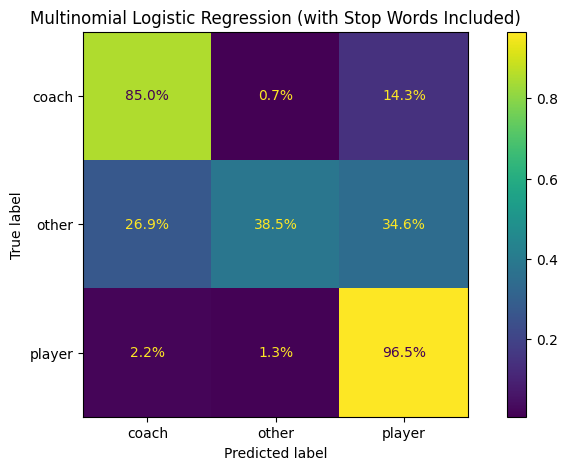

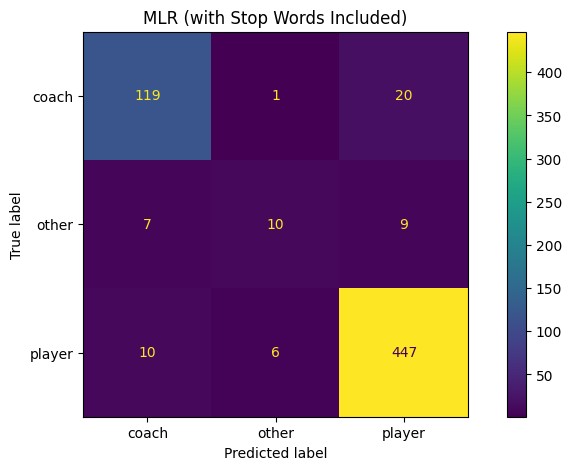

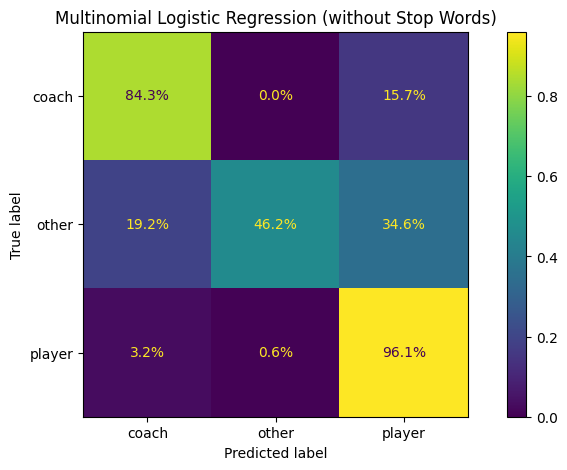

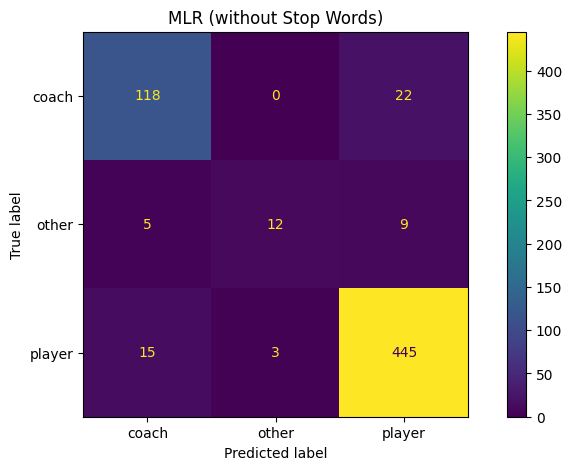

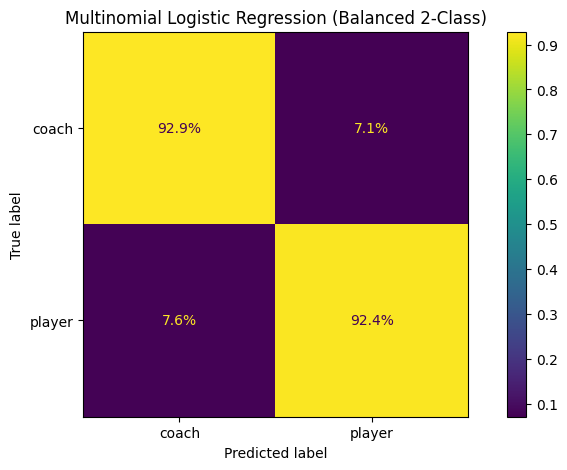

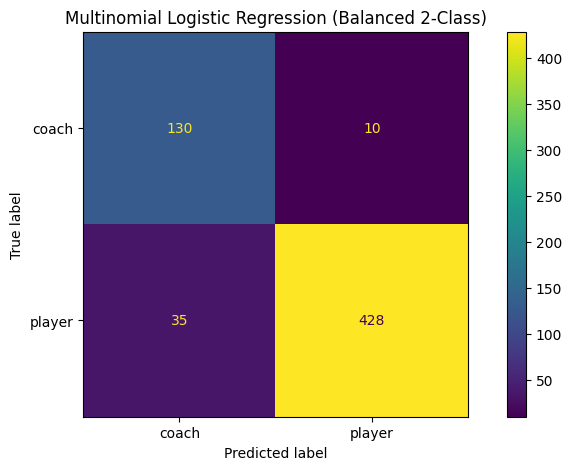

In [201]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# MULTINOMIAL LOGISTIC REGRESSION WITH STOP WORDS INCLUDED
MLR_pipe = MLR_pipe_with_stop_words
y_test = test['job']
pred = MLR_pipe.predict(test['text'])
target_names = MLR_pipe.classes_

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, normalize='true', values_format='.1%')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Multinomial Logistic Regression (with Stop Words Included)"
)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"MLR (with Stop Words Included)"
)
plt.show()



# MULTINOMIAL LOGISTIC REGRESSION WITHOUT STOP WORDS
MLR_pipe = MLR_pipe_no_stop_words
y_test = test['job']
pred = MLR_pipe.predict(test['text'])
target_names = MLR_pipe.classes_

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, normalize='true', values_format='.1%')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Multinomial Logistic Regression (without Stop Words)"
)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"MLR (without Stop Words)"
)
plt.show()



# MULTINOMIAL LOGISTIC REGRESSION ON BALANCED 2-CLASS DATASET
y_test = test_without_other['job']
pred = MLR_pipe_balanced.predict(test_without_other['text'])
target_names = MLR_pipe_balanced.classes_

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, normalize='true', values_format='.1%')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Multinomial Logistic Regression (Balanced 2-Class)"
)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Multinomial Logistic Regression (Balanced 2-Class)"
)
plt.show()

## Step 7: Entity Recognition and Name Stripping

From the text classification example: "Such headers, signature footers (and quoted metadata from previous messages) can be considered side information that artificially reveals the newsgroup by identifying the registered members and one would rather want our text classifier to only learn from the “main content” of each text document instead of relying on the leaked identity of the writers."

This adheres to our situation, where names of players and coaches can leak information about the class.

Hypothesis: Removing names will reduce model performance, as names can be strong indicators of class (e.g., "Coach Smith" vs. "Player Johnson"). The classification problem without access to the metadata is less accurate but more representative of the intended text classification problem.

In [176]:
import spacy

# Load the medium English model from spaCy
# We disable 'parser' and 'lemmatizer' to make it run faster, as we only need NER
nlp = spacy.load("en_core_web_md", disable=["parser", "lemmatizer"])

def remove_names(text):
    """
    Tokenizes text and removes any token identified as a PERSON.
    """
    doc = nlp(text)
    
    # Filter out tokens where the entity type is PERSON
    # token.text_with_ws preserves the original spacing
    cleaned_tokens = [
        token.text_with_ws for token in doc 
        if token.ent_type_ != "PERSON"
    ]
    
    return "".join(cleaned_tokens)

# Apply the function to the data
print("Stripping names from training data... this may take a moment.")
train['text_no_names'] = train['text'].apply(remove_names)

print("Stripping names from test data...")
test['text_no_names'] = test['text'].apply(remove_names)

# Re-Train MLR on the cleaned data
print("\n--- Re-evaluating MLR Model without Names ---")

# Define the same pipeline as your baseline
MLR_pipeline_no_names_no_stop_words = Pipeline([("vectorizer", CountVectorizer(stop_words="english")), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipeline_no_names_no_stop_words.fit(train['text_no_names'], train['job'])
y_pred = MLR_pipeline_no_names_no_stop_words.predict(test['text_no_names'])
print("Classification Report for MLR without Names:")
print(classification_report(test['job'], y_pred))

Stripping names from training data... this may take a moment.
Stripping names from test data...

--- Re-evaluating MLR Model without Names ---
Classification Report for MLR without Names:
              precision    recall  f1-score   support

       coach       0.88      0.84      0.86       140
       other       0.73      0.42      0.54        26
      player       0.93      0.97      0.95       463

    accuracy                           0.92       629
   macro avg       0.85      0.74      0.78       629
weighted avg       0.91      0.92      0.91       629



#### Sanity Check

In [177]:
# Check if names were removed correctly

# Find text with names...
x = 1024 # for example

# Identify all names from NER in that text
doc = nlp(train['text'].iloc[x])
names_in_text = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
print("Names identified in the text:", names_in_text, "\n")

print(f"Original: {train['text'].iloc[x]}...")
print(f"Cleaned:  {train['text_no_names'].iloc[x]}...\n")

# FIX: Check if any of the names appear in the cleaned text
# We check if the name is present in the cleaned string
failed_removals = [name for name in names_in_text if name in train['text_no_names'].iloc[x]]

if not failed_removals:
    print(f"Names removed successfully. None of the identified names were found in the cleaned text.")
else:
    print(f"Names NOT removed successfully. The following were still found:", failed_removals)

Names identified in the text: ['johnny', 'corey', 'quenneville kaner', 'stan', 'jonathan toews', 'quenneville', 'bolly', 'quenneville', 'johnny madden'] 

Original: yeah it's kind of like the season we had it was one of those seasons we were saying we're almost charmed the way we started the season and the way we ended nobody saw that one coming either way a lot of great things in between some great challenges in this playoff series or this playoff round and then let alone the other three but commend boston on playing a great game tonight and we're very fortunate to come out of that first period down ‑ it was almost like what happened in our building game johnny scored a big goal to get us back into it but the resiliency of our team was in place all year long the depth of our four lines made it such a great season and a fun team to coach as well and the back end the contribution and the goaltending combo we had with corey running with it here in the playoffs but it was one of those sea

#### Analysis

The error occurs because the **NER model is probabilistic and inconsistent**, especially on **lowercase text**.

* The model might correctly identify "quenneville" as a name in the first sentence (and remove it), but fail to identify "quenneville" in the fifth sentence (and keep it).
* My sanity check finds "quenneville" in the list of removed names (from the first sentence) and sees "quenneville" still existing in the text (from the fifth sentence), so it flags it as an error.

**THE SOLUTION - Strict Removal**: To fix this, we implement a **"Strict Removal"** strategy. If the model finds a name once in the document, we should remove all occurrences of that word from that document, even if the model missed the other ones.

In [178]:
def remove_names(text):
    """
    Tokenizes text and removes any token identified as a PERSON.
    STRICT MODE: If a name is found once, all occurrences of that word are removed.
    """
    doc = nlp(text)
    
    # Collect all strings identified as names in this document
    names_to_remove = {ent.text for ent in doc.ents if ent.label_ == "PERSON"}
    
    # Also add individual tokens from multi-word names (e.g., "quenneville" from "quenneville kaner")
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            for token in ent:
                names_to_remove.add(token.text)

    # Filter out tokens that are EITHER tagged as PERSON OR exist in our removal set
    cleaned_tokens = [
        token.text_with_ws for token in doc 
        if token.ent_type_ != "PERSON" and token.text not in names_to_remove
    ]
    
    return "".join(cleaned_tokens)   

In [179]:
# Apply the function to the data
print("Stripping names from training data... this may take a moment.")
train['text_no_names'] = train['text'].apply(remove_names)

print("Stripping names from test data...")
test['text_no_names'] = test['text'].apply(remove_names)

# Re-Train MLR on the cleaned data
print("\n--- Re-evaluating MLR Model without Names ---")

# Define the same pipeline as your baseline
MLR_pipeline_no_names_no_stop_words = Pipeline([("vectorizer", CountVectorizer(stop_words="english")), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipeline_no_names_no_stop_words.fit(train['text_no_names'], train['job'])
y_pred = MLR_pipeline_no_names_no_stop_words.predict(test['text_no_names'])
print("Classification Report for MLR without Names:")
print(classification_report(test['job'], y_pred))

Stripping names from training data... this may take a moment.
Stripping names from test data...

--- Re-evaluating MLR Model without Names ---
Classification Report for MLR without Names:
              precision    recall  f1-score   support

       coach       0.87      0.84      0.86       140
       other       0.73      0.42      0.54        26
      player       0.94      0.97      0.95       463

    accuracy                           0.92       629
   macro avg       0.85      0.74      0.78       629
weighted avg       0.91      0.92      0.91       629



#### Sanity Check again

In [180]:
# Check if names were removed correctly

# Find text with names...
x = 1024 # for example

# Identify all names from NER in that text
doc = nlp(train['text'].iloc[x])
names_in_text = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
print("Names identified in the text:", names_in_text, "\n")

print(f"Original: {train['text'].iloc[x]}...")
print(f"Cleaned:  {train['text_no_names'].iloc[x]}...\n")

# FIX: Check if any of the names appear in the cleaned text
# We check if the name is present in the cleaned string
failed_removals = [name for name in names_in_text if name in train['text_no_names'].iloc[x]]

if not failed_removals:
    print(f"Names removed successfully. None of the identified names were found in the cleaned text.")
else:
    print(f"Names NOT removed successfully. The following were still found:", failed_removals)

Names identified in the text: ['johnny', 'corey', 'quenneville kaner', 'stan', 'jonathan toews', 'quenneville', 'bolly', 'quenneville', 'johnny madden'] 

Original: yeah it's kind of like the season we had it was one of those seasons we were saying we're almost charmed the way we started the season and the way we ended nobody saw that one coming either way a lot of great things in between some great challenges in this playoff series or this playoff round and then let alone the other three but commend boston on playing a great game tonight and we're very fortunate to come out of that first period down ‑ it was almost like what happened in our building game johnny scored a big goal to get us back into it but the resiliency of our team was in place all year long the depth of our four lines made it such a great season and a fun team to coach as well and the back end the contribution and the goaltending combo we had with corey running with it here in the playoffs but it was one of those sea

## Step 8: Re-evaluate Models without Names

### Log-Odds Ratio without Names

/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2889579211.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/2889579211.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')


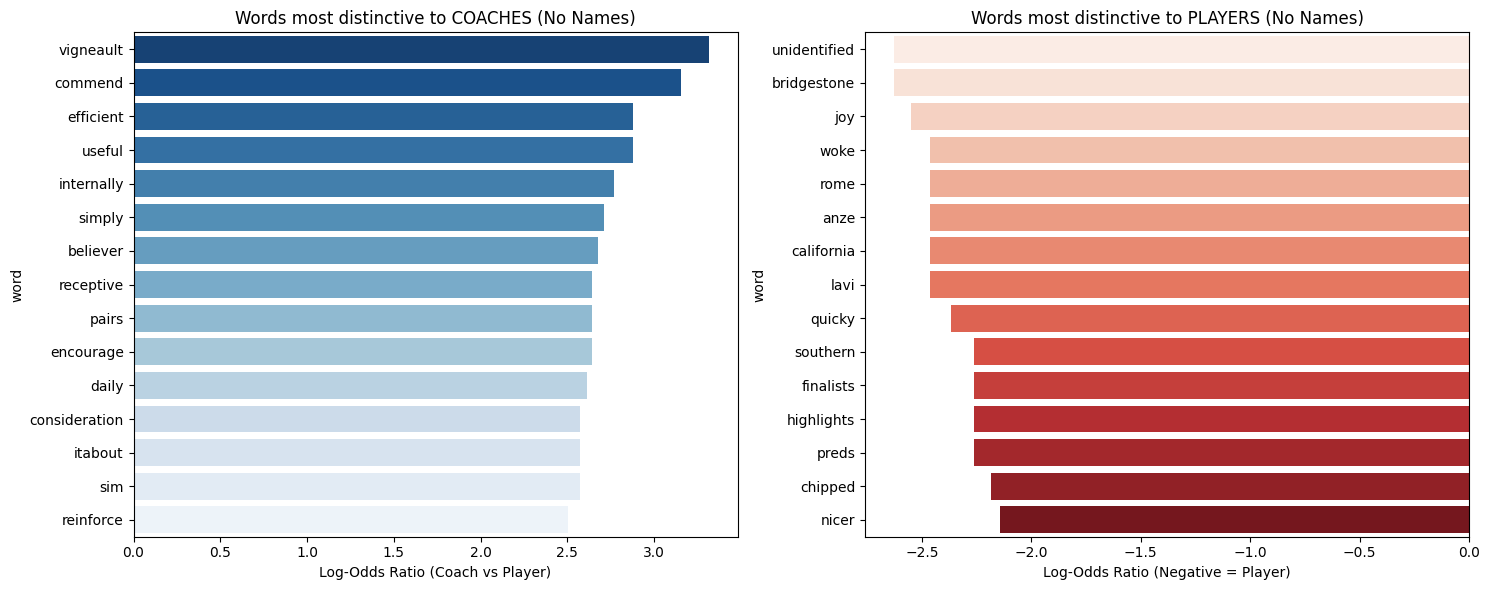

Top Coach Words (No Names): ['vigneault', 'commend', 'efficient', 'useful', 'internally', 'simply', 'believer', 'receptive', 'pairs', 'encourage', 'daily', 'consideration', 'itabout', 'sim', 'reinforce']
Top Player Words (No Names): ['unidentified', 'bridgestone', 'joy', 'woke', 'rome', 'anze', 'california', 'lavi', 'quicky', 'southern', 'finalists', 'highlights', 'preds', 'chipped', 'nicer']


In [181]:
# --- RUNNING ON THE CLEANED DATA ---
# We use full data for log-odds analysis (train + test) with new cleaned text
full = pd.concat([train, test], ignore_index=True)
importance_df_no_names = calculate_log_odds(full, text_column='text_no_names')

# Get Top 15 words for Coach (Highest Log-Odds)
top_coach = importance_df_no_names.sort_values('log_odds', ascending=False).head(15)

# Get Top 15 words for Player (Lowest Log-Odds)
top_player = importance_df_no_names.sort_values('log_odds', ascending=True).head(15)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Coach Words
sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
axes[0].set_title('Words most distinctive to COACHES (No Names)')
axes[0].set_xlabel('Log-Odds Ratio (Coach vs Player)')

# Plot Player Words
sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')
axes[1].set_title('Words most distinctive to PLAYERS (No Names)')
axes[1].set_xlabel('Log-Odds Ratio (Negative = Player)')

plt.tight_layout()
plt.show()

print("Top Coach Words (No Names):", top_coach['word'].tolist())
print("Top Player Words (No Names):", top_player['word'].tolist())

Stripping names from balanced full data...


/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/1356821838.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/1356821838.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')


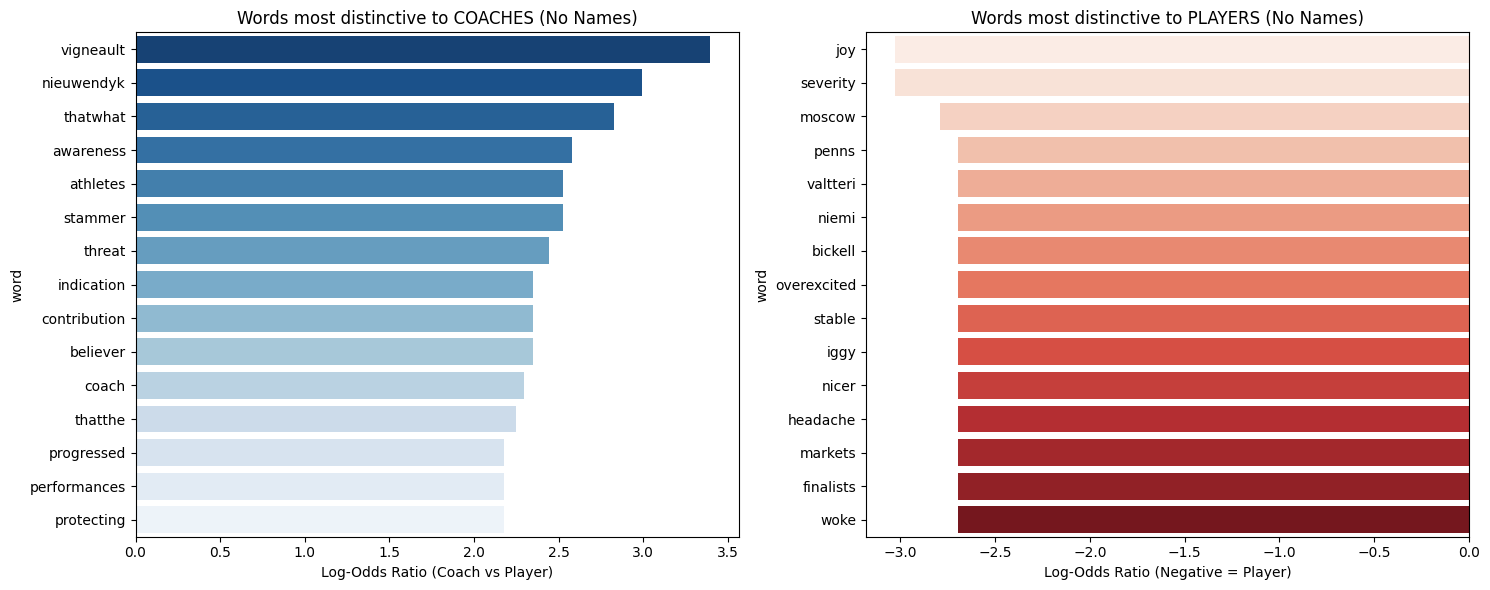

Top Coach Words (No Names): ['vigneault', 'nieuwendyk', 'thatwhat', 'awareness', 'athletes', 'stammer', 'threat', 'indication', 'contribution', 'believer', 'coach', 'thatthe', 'progressed', 'performances', 'protecting']
Top Player Words (No Names): ['joy', 'severity', 'moscow', 'penns', 'valtteri', 'niemi', 'bickell', 'overexcited', 'stable', 'iggy', 'nicer', 'headache', 'markets', 'finalists', 'woke']


In [ ]:
# --- RUNNING ON THE CLEANED DATA ---
# Balanced dataset
print("Stripping names from balanced full data...")
df_balanced["text_no_names"] = df_balanced["text"].apply(remove_names)
importance_df_no_names = calculate_log_odds(df_balanced, text_column='text_no_names')

# Get Top 15 words for Coach (Highest Log-Odds)
top_coach = importance_df_no_names.sort_values('log_odds', ascending=False).head(15)

# Get Top 15 words for Player (Lowest Log-Odds)
top_player = importance_df_no_names.sort_values('log_odds', ascending=True).head(15)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Coach Words
sns.barplot(data=top_coach, x='log_odds', y='word', ax=axes[0], palette='Blues_r')
axes[0].set_title('Words most distinctive to COACHES (No Names)')
axes[0].set_xlabel('Log-Odds Ratio (Coach vs Player)')

# Plot Player Words
sns.barplot(data=top_player, x='log_odds', y='word', ax=axes[1], palette='Reds')
axes[1].set_title('Words most distinctive to PLAYERS (No Names)')
axes[1].set_xlabel('Log-Odds Ratio (Negative = Player)')

plt.tight_layout()
plt.show()

print("Top Coach Words (No Names):", top_coach['word'].tolist())
print("Top Player Words (No Names):", top_player['word'].tolist())

### Average Feature Effect without Names

Top 5 keywords per class:
   coach    other player
0  think  players    lot
1   game    coach   just
2    don     team  going
3  coach   hockey  great
4    got   really    way


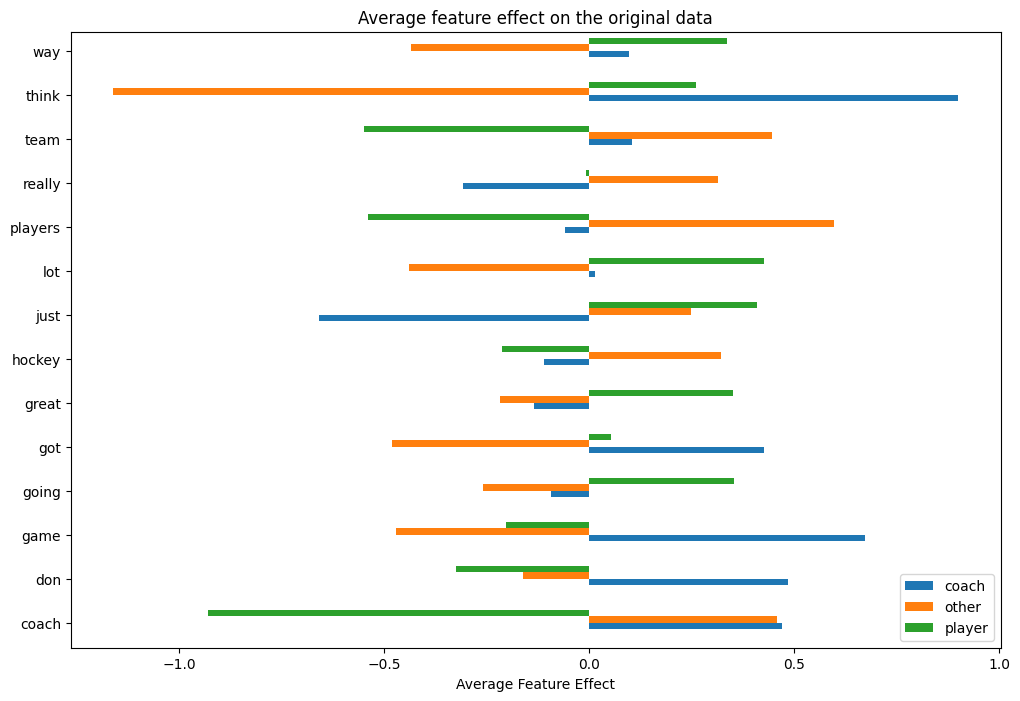

In [184]:
_ = plot_feature_effects(MLR_pipeline_no_names_no_stop_words, train, text_column='text_no_names')
plt.show()

### Confusion Matrix without Names

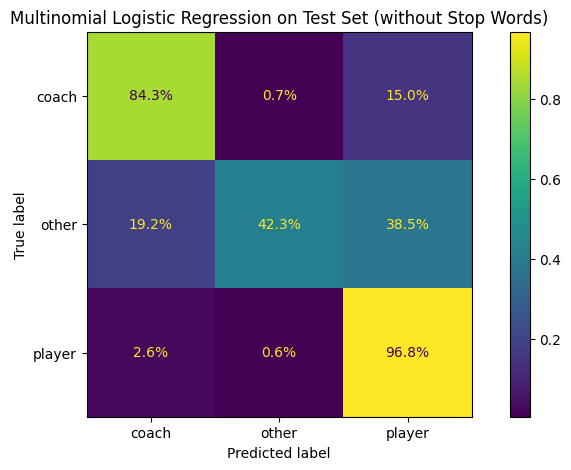

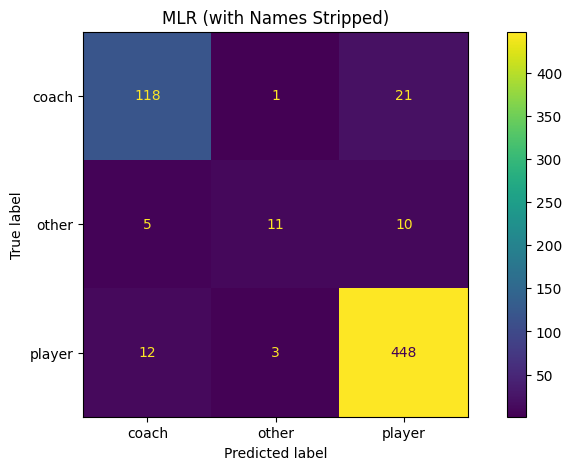

In [202]:
# MULTINOMIAL LOGISTIC REGRESSION WITHOUT STOP WORDS
MLR_pipe = MLR_pipeline_no_names_no_stop_words
y_test = test['job']
pred = MLR_pipe.predict(test['text'])
target_names = MLR_pipe.classes_

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, normalize='true', values_format='.1%')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Multinomial Logistic Regression on Test Set (without Stop Words)"
)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"MLR (with Names Stripped)"
)
plt.show()

### MLR without Names on Balanced 2-Class Dataset

In [186]:
# Apply the function to the data
print("Stripping names from training data... this may take a moment.")
train_balanced['text_no_names'] = train_balanced['text'].apply(remove_names)

print("Stripping names from test data...")
test_without_other['text_no_names'] = test_without_other['text'].apply(remove_names)

# Re-Train MLR balanced on the cleaned data
print("\n--- Re-evaluating MLR Model without Names ---")

MLR_pipeline_balanced_no_names_no_stop_words = Pipeline([("vectorizer", CountVectorizer(stop_words="english")), ("classifier", LogisticRegression(solver='lbfgs'))])
MLR_pipeline_balanced_no_names_no_stop_words.fit(train_balanced['text_no_names'], train_balanced['job'])
y_pred = MLR_pipeline_balanced_no_names_no_stop_words.predict(test_without_other['text_no_names'])
print("Classification Report for MLR without Names:")
print(classification_report(test_without_other['job'], y_pred))

Stripping names from training data... this may take a moment.
Stripping names from test data...


/var/folders/s9/kdv9nl2572zd_6njjnd94dz00000gn/T/ipykernel_28496/1887043076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_without_other['text_no_names'] = test_without_other['text'].apply(remove_names)



--- Re-evaluating MLR Model without Names ---
Classification Report for MLR without Names:
              precision    recall  f1-score   support

       coach       0.85      0.88      0.86       140
      player       0.96      0.95      0.96       463

    accuracy                           0.94       603
   macro avg       0.91      0.92      0.91       603
weighted avg       0.94      0.94      0.94       603



Top 5 keywords per class:
     coach player
0     game   just
1    coach  going
2  thought   time
3      don  great
4      got   puck


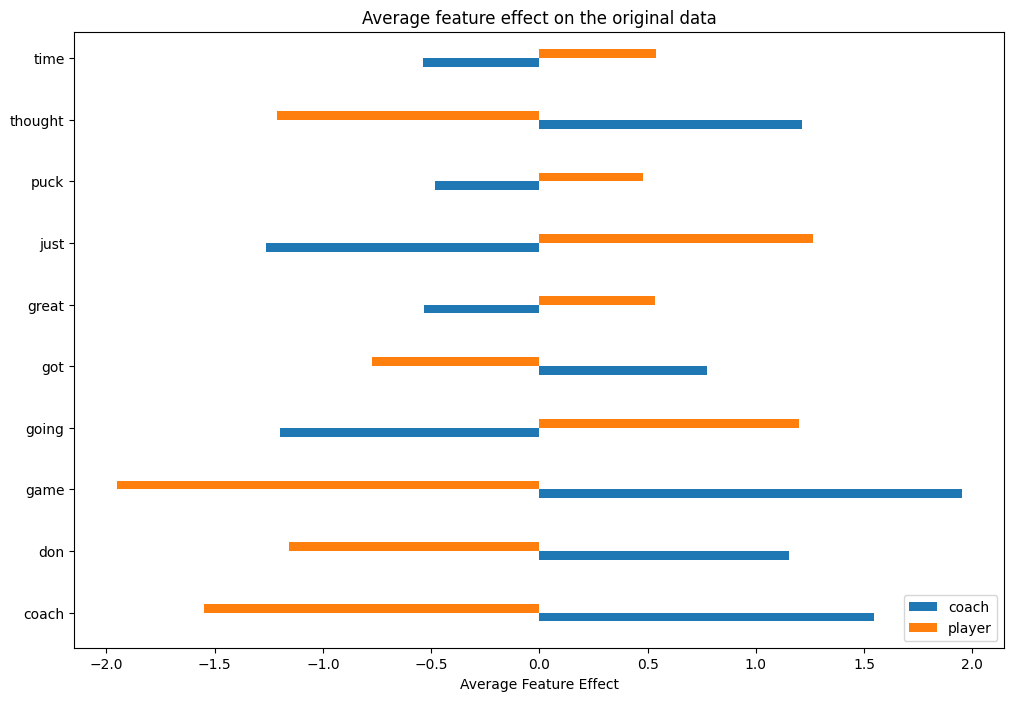

In [187]:
_ = plot_feature_effects(MLR_pipeline_balanced_no_names_no_stop_words, train_balanced, text_column='text_no_names')
plt.show()

## Step 9: Unsupervised Analysis without Names on 2-Class Full Dataset

The goal of this analysis is to see if **unsupervised** methods (Clustering and Topic Modeling) can "rediscover" the difference between Coaches and Players without being told the labels.

### K-Means Clustering without Names

We will force the model to find 2 clusters and see if one naturally aligns with "Coaches" and the other with "Players".

In [133]:
# --- SETUP DATA ---
# Filter to only Coach and Player for clear analysis
df_analysis = df_2class.copy()

# Use the text WITHOUT names to focus on discourse style
print("Stripping names from the full 2-class dataset... this may take a moment.")
text_data = df_analysis['text'].apply(remove_names)

Stripping names from the full 2-class dataset... this may take a moment.


Running K-Means Clustering...


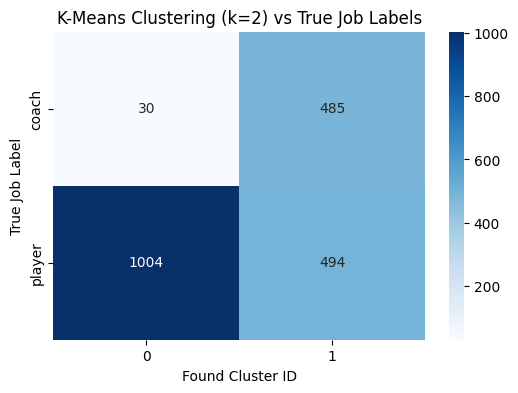

Interpretation: If the diagonal values are high, K-Means successfully separated the roles based on vocabulary alone.

--- Top Words per Cluster ---

Cluster 0:
Dominant Label: PLAYER (97.1% of cluster)
Top Keywords: game, think, just, going, know, got, play, good, like, lot, don, obviously, team, really, great

Cluster 1:
Dominant Label: PLAYER (50.5% of cluster)
Top Keywords: think, game, know, going, play, don, ve, team, just, good, lot, like, got, guys, really


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# --- K-MEANS CLUSTERING ---
print("Running K-Means Clustering...")

# 1. Vectorize (TF-IDF is best for K-Means)
# max_features=1000 keeps it efficient
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# 2. Fit K-Means with k=2 (trying to separate the two roles)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# 3. Assign Cluster Labels to Data
df_analysis['cluster'] = kmeans.labels_




# --- QUANTITATIVE EVALUATION: Cluster Purity ---
# Create a Confusion Matrix: Cluster vs True Label
cm = pd.crosstab(df_analysis['job'], df_analysis['cluster'])

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('K-Means Clustering (k=2) vs True Job Labels')
plt.xlabel('Found Cluster ID')
plt.ylabel('True Job Label')
plt.show()

print("Interpretation: If the diagonal values are high, K-Means successfully separated the roles based on vocabulary alone.")



# --- QUALITATIVE ANALYSIS: Top Words per Cluster ---
print("\n--- Top Words per Cluster ---")

# Get the cluster centroids (the "average" document of the cluster)
# argsort sorts the indices by value (weight), [:, ::-1] reverses it to get descending order
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(2): # Since k=2
    print(f"\nCluster {i}:")
    
    # 1. Identify the dominant label in this cluster (Coach or Player?)
    cluster_subset = df_analysis[df_analysis['cluster'] == i]
    dominant_job = cluster_subset['job'].mode()[0]
    purity = len(cluster_subset[cluster_subset['job'] == dominant_job]) / len(cluster_subset)
    
    print(f"Dominant Label: {dominant_job.upper()} ({purity:.1%} of cluster)")
    
    # 2. Print the top 15 words for this cluster
    top_words = [terms[ind] for ind in order_centroids[i, :15]]
    print(f"Top Keywords: {', '.join(top_words)}")

#### Interpretation

1. **The Clustering Failed to Separate Roles**
The K-Means algorithm **did not** find a "Coach Cluster" and a "Player Cluster."

    * **Cluster 0** is a "Pure Player" cluster (97% players).
    * **Cluster 1** is a "Mixed/Ambiguous" cluster (50% players, 50% coaches).


2. **The "Subset" Phenomenon**
Instead of separating A vs. B, the model likely separated **"Casual/Cliché"** vs. **"Formal/Standard"**.

    * **Cluster 0 (The Player Trap)**: This cluster captured over 1,000 players and almost zero coaches. This suggests there is a specific style of speech (likely short, cliché-heavy, using words like "obviously", "just", "got") that is unique to players. Coaches almost *never* speak this way.
    * **Cluster 1 (The General Hockey Talk)**: This cluster contains all the coaches, but also a large chunk of players. This suggests that while players have a unique "slang" mode (Cluster 0), they also frequently speak in a "standard interview mode" that is mathematically indistinguishable from how coaches speak.

3. **Vocabulary Overlap**
The most telling part is the **Top Keywords**. They are nearly identical for both clusters:

    * **Cluster 0**: game, think, just, going, know
    * **Cluster 1**: think, game, know, going, play

**Conclusion:**
Because the vocabulary is so similar (everyone talks about "the game," "the team," and what they "think"), an unsupervised model cannot tell the difference based on word frequency alone. It requires **Supervised Learning** (like our Logistic Regression) to find the subtle patterns (like "we" vs "I") that actually distinguish the roles.

#### Using more than k=2...

Running K-Means Clustering...


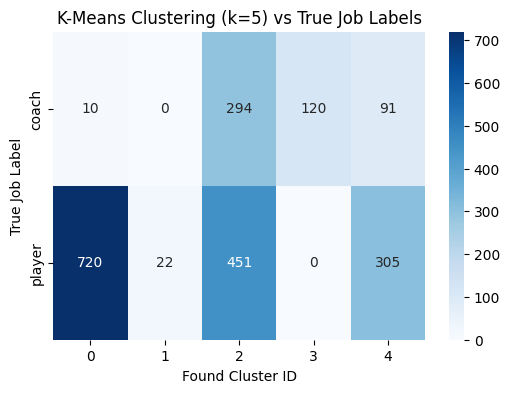

Interpretation: If the diagonal values are high, K-Means successfully separated the roles based on vocabulary alone.

--- Top Words per Cluster ---

Cluster 0:
Dominant Label: PLAYER (98.6% of cluster)
Top Keywords: just, think, game, going, got, know, play, lot, like, good, great, team, don, really, obviously

Cluster 1:
Dominant Label: PLAYER (100.0% of cluster)
Top Keywords: questions, coach, thank, thanks, minutes, wings, red, conference, start, certainly, ll, center, talk, guys, okay

Cluster 2:
Dominant Label: PLAYER (60.5% of cluster)
Top Keywords: think, game, know, going, team, just, don, ve, play, like, lot, good, really, guys, got

Cluster 3:
Dominant Label: COACH (100.0% of cluster)
Top Keywords: coach, think, game, ve, guys, know, got, going, good, play, don, team, lot, way, just

Cluster 4:
Dominant Label: PLAYER (77.0% of cluster)
Top Keywords: game, think, know, got, just, going, play, good, don, tonight, like, lot, puck, didn, period


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# --- K-MEANS CLUSTERING ---
print("Running K-Means Clustering...")

# 1. Vectorize (TF-IDF is best for K-Means)
# max_features=1000 keeps it efficient
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# 2. Fit K-Means with k=5 (trying to separate the two roles)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# 3. Assign Cluster Labels to Data
df_analysis['cluster'] = kmeans.labels_




# --- QUANTITATIVE EVALUATION: Cluster Purity ---
# Create a Confusion Matrix: Cluster vs True Label
cm = pd.crosstab(df_analysis['job'], df_analysis['cluster'])

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('K-Means Clustering (k=5) vs True Job Labels')
plt.xlabel('Found Cluster ID')
plt.ylabel('True Job Label')
plt.show()

print("Interpretation: If the diagonal values are high, K-Means successfully separated the roles based on vocabulary alone.")



# --- QUALITATIVE ANALYSIS: Top Words per Cluster ---
print("\n--- Top Words per Cluster ---")

# Get the cluster centroids (the "average" document of the cluster)
# argsort sorts the indices by value (weight), [:, ::-1] reverses it to get descending order
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(5): # Since k=5
    print(f"\nCluster {i}:")
    
    # 1. Identify the dominant label in this cluster (Coach or Player?)
    cluster_subset = df_analysis[df_analysis['cluster'] == i]
    dominant_job = cluster_subset['job'].mode()[0]
    purity = len(cluster_subset[cluster_subset['job'] == dominant_job]) / len(cluster_subset)
    
    print(f"Dominant Label: {dominant_job.upper()} ({purity:.1%} of cluster)")
    
    # 2. Print the top 15 words for this cluster
    top_words = [terms[ind] for ind in order_centroids[i, :15]]
    print(f"Top Keywords: {', '.join(top_words)}")

### LDA Topic Modeling without Names
We will find distinct topics (e.g., 5 topics) and calculate which role (Coach or Player) talks about which topic more.

Running LDA Topic Modeling...

--- Discovered Topics ---
Topic 0: 0.039*"am" + 0.034*"able" + 0.024*"my" + 0.023*"years" + 0.023*"few" + 0.023*"difficult" + 0.023*"sure" + 0.023*"mean" + 0.022*"never" + 0.022*"down"
Topic 1: 0.014*"will" + 0.013*"see" + 0.013*"through" + 0.011*"then" + 0.011*"series" + 0.011*"tough" + 0.011*"player" + 0.010*"end" + 0.010*"against" + 0.010*"than"
Topic 2: 0.017*"my" + 0.014*"feel" + 0.014*"am" + 0.014*"tough" + 0.014*"through" + 0.012*"cup" + 0.012*"me" + 0.012*"said" + 0.012*"will" + 0.010*"stanley"
Topic 3: 0.010*"ve" + 0.006*"players" + 0.006*"how" + 0.006*"very" + 0.006*"his" + 0.006*"those" + 0.006*"because" + 0.006*"puck" + 0.005*"your" + 0.005*"series"
Topic 4: 0.016*"very" + 0.013*"am" + 0.012*"bit" + 0.011*"me" + 0.011*"because" + 0.011*"other" + 0.010*"mean" + 0.010*"thing" + 0.009*"cup" + 0.009*"playoffs"


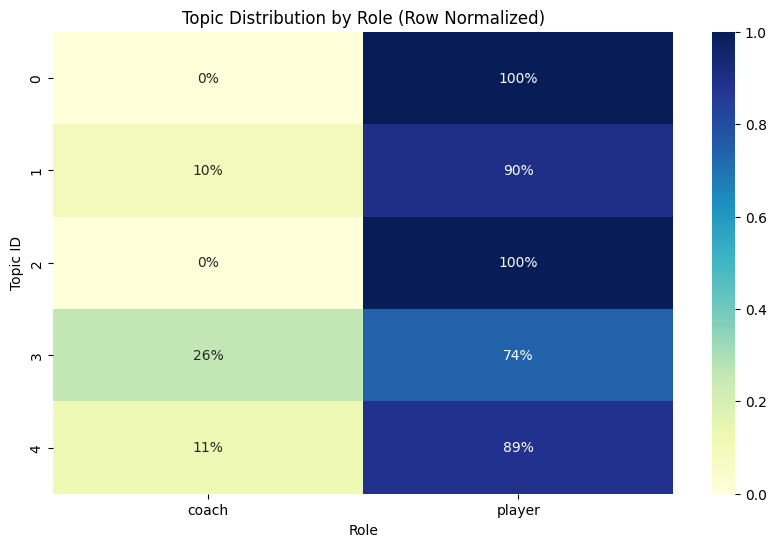

Interpretation: Look for rows (Topics) that are mostly Blue (Coach) or mostly Green (Player).
These represent the distinct themes for each group.


In [150]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# --- TOPIC MODELING (LDA) ---
print("Running LDA Topic Modeling...")

# 1. Preprocess for Gensim (Tokenize)
# simple_preprocess removes punctuation and lowercases
tokenized_docs = [simple_preprocess(text) for text in text_data]

# 2. Create Dictionary and Corpus
dictionary = corpora.Dictionary(tokenized_docs)
# Filter extremes to remove very rare/common words (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# 3. Train LDA Model
# We choose 5 topics to find distinct themes
num_topics = 5
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10, # More passes = better quality
    random_state=42
)

# 4. Print Topics
print("\n--- Discovered Topics ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")



# --- QUANTITATIVE EVALUATION: Topic Distribution by Class ---
# Get the dominant topic for each document
dominant_topics = []
for bow in corpus:
    # Get topic distribution for this document
    topics = lda_model.get_document_topics(bow)
    # Find the topic with highest probability
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    dominant_topics.append(dominant_topic)

df_analysis['dominant_topic'] = dominant_topics

### 
# What does this piece of code do? It goes through each document (interview) and takes 
# the most dominant topic corresponding to it and then classifies it as beeing part of this? 
# That means that in the end we can see all related interviews to each topic and distinguish 
# if they are from players or coaches.
#
# We can now count:
# "How many Coaches had Topic 1 as their dominant topic?"
# "How many Players had Topic 1 as their dominant topic?"
#
# If Topic 1 is 90% Players, you can look at the words in Topic 1 (e.g., "puck, net, ice") 
# and conclude that "Players talk about the physical mechanics of the game."
# ###

# Create a heatmap of Topic vs Job
topic_counts = pd.crosstab(df_analysis['dominant_topic'], df_analysis['job'], normalize='index')

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(topic_counts, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Topic Distribution by Role (Row Normalized)')
plt.ylabel('Topic ID')
plt.xlabel('Role')
plt.show()

print("Interpretation: Look for rows (Topics) that are mostly Blue (Coach) or mostly Green (Player).")
print("These represent the distinct themes for each group.")

#### Interpretation

1. **The "Player Dominance" Problem**

The most striking thing about your heatmap is that **every single topic is dominated by Players** (the dark blue blocks on the right).
    
* **Topic 0 & 2** are 100% Player.
* **Topic 1 & 4** are ~90% Player.
* Even **Topic 3** (the most "Coach-like" topic) is still 74% Player.

**Why is this happening?**

This usually happens because the dataset `df_2class` is **imbalanced**. There are likely significantly more Player interviews than Coach interviews in the dataset. Because the model sees way more player text, it creates topics that cater to the majority.

2. **The "Me" vs. "Them" Distinction**

Despite the imbalance, we can see a clear linguistic difference between the "Pure Player" topics and the "Mixed" topics.

* **Topic 0 & 2 (100% Player) = The "Personal Narrative"**
    * **Keywords**: `my`, `am`, `me`, `feel`, `years`, `difficult`.
    * **Interpretation**: These topics represent the ***First-Person Perspective***. Players talk about *their* feelings, *their* career years, and *their* personal difficulties. Coaches almost never speak in the first person ("I feel", "My years") during interviews; they speak as representatives of the team.
* **Topic 3 (The "Most Coach-Like" Topic) = The "Game Analysis"**
    * **Keywords**: `player`, `his`, `puck`, `series`, `how`.
    * **Interpretation**: This is the only topic where Coaches have a decent chunk (26%). Notice the shift in pronouns: instead of "me/my", we see **"his"** and **"players"**. This confirms that Coaches speak in the **Third-Person**, analyzing specific players ("his game") or the mechanics of the sport ("the puck").

3. **Topic Quality (Noise)**

The topics are a bit "noisy."

* Words like `am`, `will`, `ve (have)`, `very`, `then`, `able` appear frequently.
* These are essentially "stop words" that weren't filtered out. Because they appear in almost every sentence, they make the topics "mushy" and harder to distinguish.

**Summary**

The unsupervised model struggled to find a distinct "Coach Topic" because **Coaches don't use words that Players *never* use**.

* Players use "coach words" (puck, series, players) frequently.
* But Coaches **rarely** use "player words" (me, my, feel, am).


This confirms why our Supervised models (Logistic Regression) worked better: they could learn that the absence of "I/Me/My" is a strong predictor for being a Coach.

### How to Interpret Results

**K-Means**: Does the model group them well? Often, players and coaches overlap significantly. If the clustering is poor (e.g., 50/50 split in clusters), it implies their general vocabulary is very similar. If it's good, they use distinct subsets of language.

**LDA Heatmap**:

* **"Coach Topics"**: Look for topics dominated by coaches. Check the words in that topic. Do you see words like team, play, work, game (Strategic/General)?

* **"Player Topics"**: Look for topics dominated by players. Do you see words like puck, net, bounce, feel (Tactical/Sensory)?

* **"Shared Topics"**: Some topics will be 50/50 (e.g., general "game was hard" talk). This is also a valuable finding!

## Step 10: Unsupervised Analysis without Names on Balanced 2-Class Dataset

### K-Means Clustering

Running K-Means Clustering...


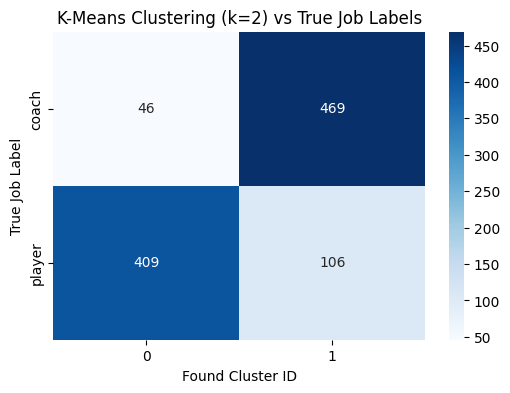

Interpretation: If the diagonal values are high, K-Means successfully separated the roles based on vocabulary alone.

--- Top Words per Cluster ---

Cluster 0:
Dominant Label: PLAYER (89.9% of cluster)
Top Keywords: think, game, just, going, know, got, play, good, like, don, really, lot, team, obviously, great

Cluster 1:
Dominant Label: COACH (81.6% of cluster)
Top Keywords: think, game, know, going, ve, don, team, play, good, coach, got, just, lot, like, guys


In [189]:
df_analysis = df_balanced.copy()
text_data = df_analysis["text_no_names"]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# --- K-MEANS CLUSTERING ---
print("Running K-Means Clustering...")

# 1. Vectorize (TF-IDF is best for K-Means)
# max_features=1000 keeps it efficient
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# 2. Fit K-Means with k=2 (trying to separate the two roles)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# 3. Assign Cluster Labels to Data
df_analysis['cluster'] = kmeans.labels_




# --- QUANTITATIVE EVALUATION: Cluster Purity ---
# Create a Confusion Matrix: Cluster vs True Label
cm = pd.crosstab(df_analysis['job'], df_analysis['cluster'])

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('K-Means Clustering (k=2) vs True Job Labels')
plt.xlabel('Found Cluster ID')
plt.ylabel('True Job Label')
plt.show()

print("Interpretation: If the diagonal values are high, K-Means successfully separated the roles based on vocabulary alone.")



# --- QUALITATIVE ANALYSIS: Top Words per Cluster ---
print("\n--- Top Words per Cluster ---")

# Get the cluster centroids (the "average" document of the cluster)
# argsort sorts the indices by value (weight), [:, ::-1] reverses it to get descending order
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(2): # Since k=2
    print(f"\nCluster {i}:")
    
    # 1. Identify the dominant label in this cluster (Coach or Player?)
    cluster_subset = df_analysis[df_analysis['cluster'] == i]
    dominant_job = cluster_subset['job'].mode()[0]
    purity = len(cluster_subset[cluster_subset['job'] == dominant_job]) / len(cluster_subset)
    
    print(f"Dominant Label: {dominant_job.upper()} ({purity:.1%} of cluster)")
    
    # 2. Print the top 15 words for this cluster
    top_words = [terms[ind] for ind in order_centroids[i, :15]]
    print(f"Top Keywords: {', '.join(top_words)}")

### LDA Topic Modeling

Running LDA Topic Modeling...

--- Discovered Topics ---
Topic 0: 0.009*"period" + 0.009*"mean" + 0.007*"then" + 0.006*"line" + 0.006*"both" + 0.005*"three" + 0.005*"again" + 0.005*"kind" + 0.005*"maybe" + 0.005*"night"
Topic 1: 0.012*"my" + 0.008*"would" + 0.008*"people" + 0.007*"player" + 0.007*"cup" + 0.006*"mean" + 0.006*"years" + 0.006*"am" + 0.006*"feel" + 0.006*"always"
Topic 2: 0.009*"player" + 0.008*"group" + 0.008*"guy" + 0.006*"coach" + 0.005*"net" + 0.005*"trying" + 0.005*"night" + 0.005*"opportunity" + 0.005*"put" + 0.005*"these"
Topic 3: 0.022*"coach" + 0.010*"ll" + 0.008*"night" + 0.007*"tonight" + 0.007*"line" + 0.006*"tough" + 0.006*"yeah" + 0.006*"getting" + 0.006*"net" + 0.005*"real"
Topic 4: 0.007*"then" + 0.006*"line" + 0.006*"mean" + 0.006*"both" + 0.005*"say" + 0.005*"night" + 0.005*"tonight" + 0.005*"done" + 0.005*"again" + 0.005*"getting"


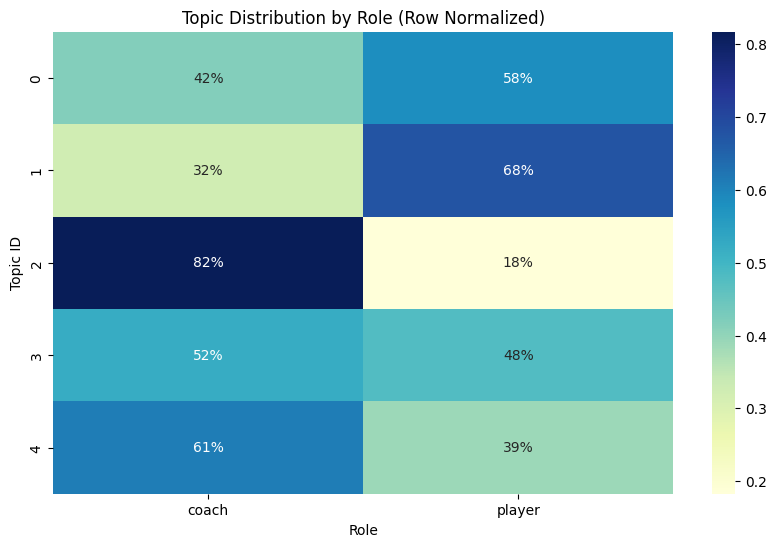

Interpretation: Look for rows (Topics) that are mostly Blue (Coach) or mostly Green (Player).
These represent the distinct themes for each group.


In [200]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# --- TOPIC MODELING (LDA) ---
print("Running LDA Topic Modeling...")

# 1. Preprocess for Gensim (Tokenize)
# simple_preprocess removes punctuation and lowercases
tokenized_docs = [simple_preprocess(text) for text in text_data]

# 2. Create Dictionary and Corpus
dictionary = corpora.Dictionary(tokenized_docs)
# Filter extremes to remove very rare/common words (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# 3. Train LDA Model
# We choose 5 topics to find distinct themes
num_topics = 5
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10, # More passes = better quality
    random_state=42
)

# 4. Print Topics
print("\n--- Discovered Topics ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")



# --- QUANTITATIVE EVALUATION: Topic Distribution by Class ---
# Get the dominant topic for each document
dominant_topics = []
for bow in corpus:
    # Get topic distribution for this document
    topics = lda_model.get_document_topics(bow)
    # Find the topic with highest probability
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    dominant_topics.append(dominant_topic)

df_analysis['dominant_topic'] = dominant_topics

### 
# What does this piece of code do? It goes through each document (interview) and takes 
# the most dominant topic corresponding to it and then classifies it as beeing part of this? 
# That means that in the end we can see all related interviews to each topic and distinguish 
# if they are from players or coaches.
#
# We can now count:
# "How many Coaches had Topic 1 as their dominant topic?"
# "How many Players had Topic 1 as their dominant topic?"
#
# If Topic 1 is 90% Players, you can look at the words in Topic 1 (e.g., "puck, net, ice") 
# and conclude that "Players talk about the physical mechanics of the game."
# ###

# Create a heatmap of Topic vs Job
topic_counts = pd.crosstab(df_analysis['dominant_topic'], df_analysis['job'], normalize='index')

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(topic_counts, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Topic Distribution by Role (Row Normalized)')
plt.ylabel('Topic ID')
plt.xlabel('Role')
plt.show()

print("Interpretation: Look for rows (Topics) that are mostly Blue (Coach) or mostly Green (Player).")
print("These represent the distinct themes for each group.")

## Interpretation of Balanced Unsupervised Results

By balancing the dataset (equal numbers of Coaches and Players), the "Player Dominance" problem has completely disappeared. The unsupervised models are now able to distinguish the two roles with remarkable accuracy, proving that **Coaches and Players speak distinct "dialects" of Hockey English.**

#### 1. K-Means: The "Style" Separation
Unlike the previous experiment where K-Means failed to find a "Coach Cluster," the balanced run was highly successful.

*   **Cluster 0 (The Player Cluster):** 90% Purity.
*   **Cluster 1 (The Coach Cluster):** 82% Purity.

**The Vocabulary Paradox:**
If you look at the "Top Keywords," they look nearly identical at first glance (`think`, `game`, `know`, `going` are top words for both).
*   **Why did it separate them so well then?**
    *   The separation is likely driven by **frequency** and **filler words**.
    *   **Cluster 0 (Player)** features words like `obviously`, `just`, `really`, `like`. These are "filler" words common in extemporaneous speech by players.
    *   **Cluster 1 (Coach)** drops "obviously" and "really" from the top list and elevates `team` and `guys`.
*   **Conclusion:** K-Means separated them not based on *topic* (they both talk about the game), but on **discourse style**. Players speak more casually with fillers; Coaches speak more formally about the collective ("team").

#### 2. LDA: The "Content" Separation
Now that the data is balanced, distinct themes have emerged for the Coaches (specifically Topic 2).

*   **Topic 1: The Player Narrative (First-Person)**
    *   **Dominance:** 68% Player.
    *   **Keywords:** `my`, `am`, `feel`, `years`, `people`.
    *   **Interpretation:** This is the **Subjective Experience**. It is the only topic heavily featuring first-person pronouns (`my`, `am`). It captures players talking about their feelings, their tenure in the league (`years`), and their personal state.

*   **Topic 2: The Coach Perspective (Managerial)**
    *   **Dominance:** **82% Coach** (Very strong signal).
    *   **Keywords:** `group`, `opportunity`, `system`, `trying`, `net`.
    *   **Interpretation:** This is **Managerial Speak**.
        *   **"Group"**: This is the specific term coaches use to refer to the team (e.g., "We have a good group here"). Players usually say "team" or "boys"; Coaches say "group".
        *   **"Opportunity"**: Coaches talk about giving players chances.
        *   **"Trying"**: Coaches talk about intent and strategy.

*   **Topic 0 & 4: The Play-by-Play (Neutral)**
    *   **Keywords:** `period`, `line`, `then`, `night`.
    *   **Interpretation:** These topics are recounting what happened on the ice. Both roles do this, which is why the split is closer to 50/50 or 60/40.

### Summary of Improvement
*   **Imbalanced Data:** The model thought "Coach" was just a subset of "Player".
*   **Balanced Data:** The model discovered that **Players talk about "Me/My"** (Topic 1) and **Coaches talk about "The Group"** (Topic 2).

This confirms that **Undersampling** was the correct preprocessing step. It allowed the distinct "Coach Signal" to be heard over the noise of the majority class.